In [ ]:
pip install peakutils

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from peakutils import indexes
from scipy.signal import find_peaks as fp

In [ ]:
df = pd.read_excel('Methane .xlsx')

In [118]:
df2 = df.rename(columns={"CH4 ppm":"CH4"})

In [119]:
df1 = df2[1:400]

In [120]:
df1


,CH4
1,764.1
2,876.5
3,876.5
4,987.2
5,987.2
...,...
395,73.2
396,73.2
397,53.7
398,53.7


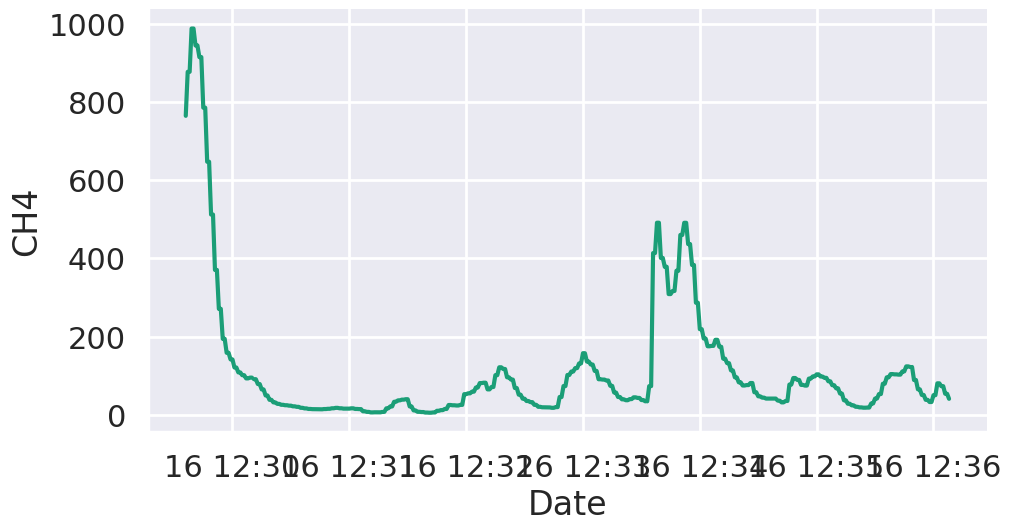

In [ ]:
# @title Date vs CH4

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CH4']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CH4')

In [121]:
sns.set_theme(font_scale=1, context= 'poster')

<Axes: >

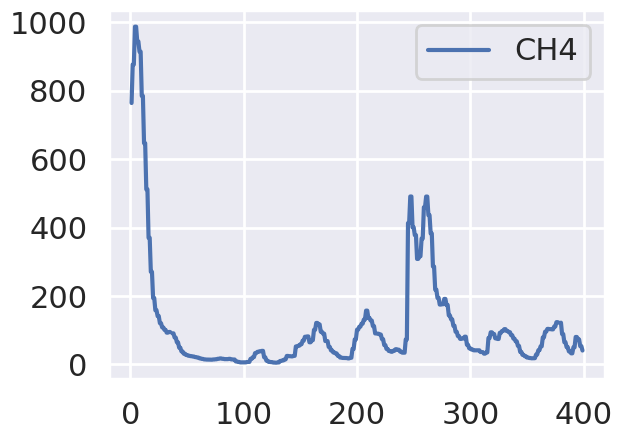

In [122]:
df1.plot()

In [ ]:
Peak Utils



In [123]:
mdist = 4
thres_ = 0.1
p1 = indexes(df1.CH4,
             min_dist=mdist,
             thres=thres_)

In [124]:
p1


array([  3, 163, 207, 246, 260, 276, 367, 375])

<Axes: ylabel='CH4'>

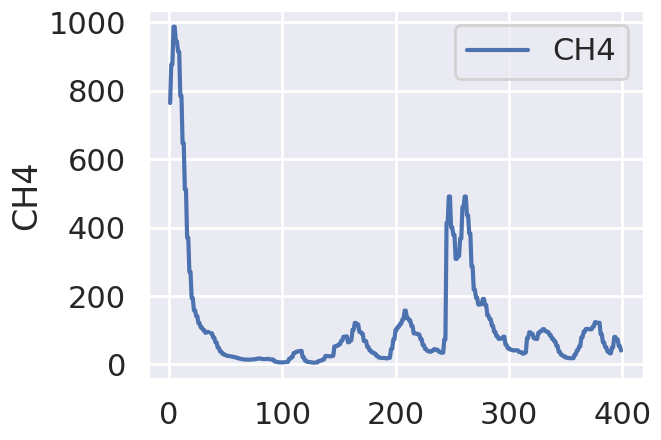

In [125]:
df1.plot()
sns.scatterplot(data=df1.iloc[p1],
                y = 'CH4',
                color = 'red')

In [126]:
h = None
prom = None
dist = None

p2, _ = fp(x = df1.CH4,
           height = h,
           prominence=prom,
           distance=dist)

<Axes: ylabel='CH4'>

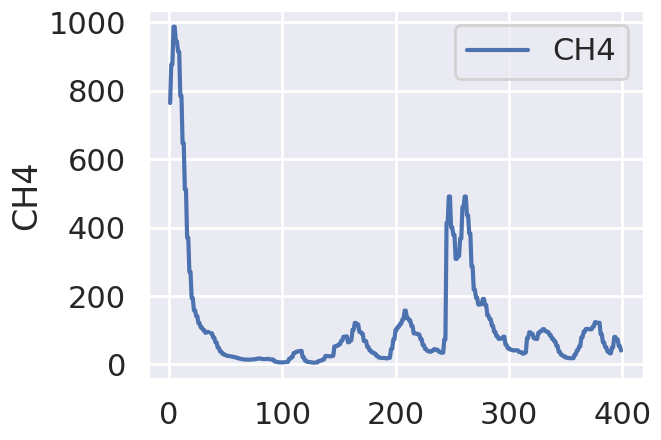

In [127]:
df1.plot()
sns.scatterplot(data=df1.iloc[p2].reset_index(),
                y = 'CH4',
                color = 'red', alpha = 0.5)